# Análise Exploratória de Dados - Transações de uma padaria
#### *(Exploratory Data Analaysis - Transactions from a Bakery)*

A **Análise Exploratória de Dados** é uma parte importante dos projetos em Data Science.

É nesta etapa que buscamos conhecer mais a fundo os dados com que estamos trabalhando. Durante o processo, entendemos o nosso dataset, estudamos as variáveis e procuramos pontos importantes que possam nos ajudar na resolução do problema que estamos tentando resolver.

Com o intuito de incrementar meu aprendizado, decidi realizar este pequeno projeto de análise exploratória utilizando um dataset bem simples que pode ser encontrado no Kaggle (Kaggle é um site de competições, aprendizado, e projetos em Data Science).

Você pode acessar esse dataset através do link ou no repositório deste projeto:

- https://www.kaggle.com/xvivancos/transactions-from-a-bakery
- https://github.com/hugotrigueiro/Dataset-Transactions-from-a-Bakery-Exploratory-Data-Analysis-

**Vamos lá!**

## Dicionário do Dataset

Antes de iniciarmos o projeto, vou dar uma olhada no **dicionário** do nosso dataset:

- **Variável categórica (Data):** nos diz a data das transações no formato (AAAA-MM-DD). A coluna inclui datas de 30/10/2016 até 09/04/2017.

- **Variável categórica (Hora):** nos diz a hora das transações.
    

- **Variável quantitativa (Transação):** nos permite diferenciar as transações. As linhas que compartilham o mesmo valor neste campo pertencem a mesma transação, é por isso que o dataset tem menos transações do que observações.


- **Variável categórica (Item):** são próprios produtos.

## Ajustando as Ferramentas

Antes de começar qualquer projeto, precisamos preparar as ferramentas que vamos usar, concorda?

No nosso caso, vamos precisar de 3 bibliotecas, são elas:
- Pandas
- Matplotlib
- Seaborn

In [676]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Este comando '%matplotlib inline' é específico do Jupyter Notebook, ele serve para que o plot dos gráficos do Matplotlib aconteça dentro do próprio Jupyter, sem a necessidade de abrir uma nova janela para isso.

In [650]:
dataset = pd.read_csv('BreadBasket_DMS.csv')

In [651]:
dataset.tail()

,Date,Time,Transaction,Item
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry
21292,2017-04-09,15:04:24,9684,Smoothies


In [652]:
dataset.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [653]:
dataset.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [654]:
print(len(dataset['Date'].unique()))
dataset['Date'].unique()

159


array(['2016-10-30', '2016-10-31', '2016-11-01', '2016-11-02',
       '2016-11-03', '2016-11-04', '2016-11-05', '2016-11-06',
       '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10',
       '2016-11-11', '2016-11-12', '2016-11-13', '2016-11-14',
       '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18',
       '2016-11-19', '2016-11-20', '2016-11-21', '2016-11-22',
       '2016-11-23', '2016-11-24', '2016-11-25', '2016-11-26',
       '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30',
       '2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04',
       '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08',
       '2016-12-09', '2016-12-10', '2016-12-11', '2016-12-12',
       '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
       '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20',
       '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
       '2016-12-31', '2017-01-01', '2017-01-03', '2017-

In [655]:
data = pd.DataFrame()

In [656]:
date = []

for i in dataset['Date'].unique():
    date.append(i)
    
data['Date'] = pd.Series(date)

In [657]:
data.head()

,Date
0,2016-10-30
1,2016-10-31
2,2016-11-01
3,2016-11-02
4,2016-11-03


In [658]:
number_of_transactions = []

for date in data['Date']:
    transactions = len(dataset.loc[dataset['Date'] == date]['Transaction'].unique())
    number_of_transactions.append(transactions)
    
data['Number of Transactions'] = pd.Series(number_of_transactions)

In [659]:
data.head()

,Date,Number of Transactions
0,2016-10-30,79
1,2016-10-31,96
2,2016-11-01,77
3,2016-11-02,83
4,2016-11-03,95


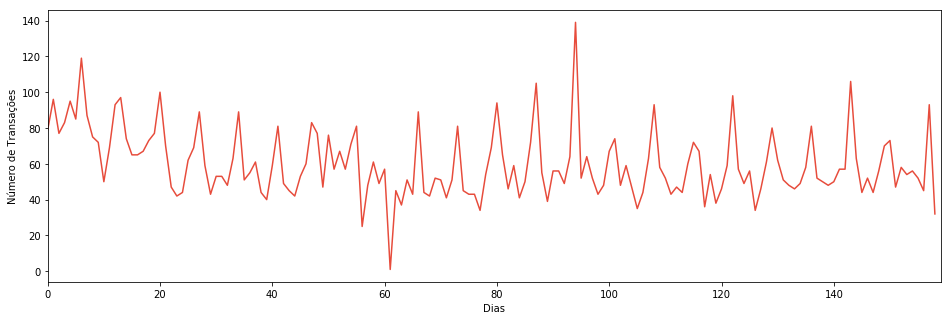

In [672]:
plt.figure(1, figsize=(16, 5))
plt.plot(data['Date'], data['Number of Transactions'], color='#e74c3c')
plt.xlim(0, 159)
plt.xscale('linear')
plt.xlabel('Dias')
plt.ylabel('Número de Transações')
plt.show()

In [661]:
for i in dataset['Item'].unique():
    data[i] = pd.Series()

In [683]:
x = 0
for date in data['Date']:  
    result = dataset.loc[dataset['Date'] == date]['Item'].value_counts()
    for index in result.index:
        final = data[index][x]
        final = result[index]
    x = x + 1

In [684]:
data.isnull().sum().sort_values(ascending=False)

Raw bars                         158
Pintxos                          158
Polenta                          158
Olum & polenta                   158
Caramel bites                    158
Tshirt                           158
Siblings                         158
Postcard                         158
Bacon                            158
Hack the stack                   158
Adjustment                       158
Gift voucher                     158
The BART                         158
Chicken sand                     158
Spread                           157
Bread Pudding                    157
Bowl Nic Pitt                    157
Fairy Doors                      157
Tacos/Fajita                     157
Chimichurri Oil                  157
Cherry me Dried fruit            156
Brioche and salami               156
Panatone                         156
Empanadas                        156
Raspberry shortbread sandwich    156
Crepes                           156
Basket                           156
H

In [685]:
cl_data = data.fillna(0)

In [686]:
dataset['Item'].value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

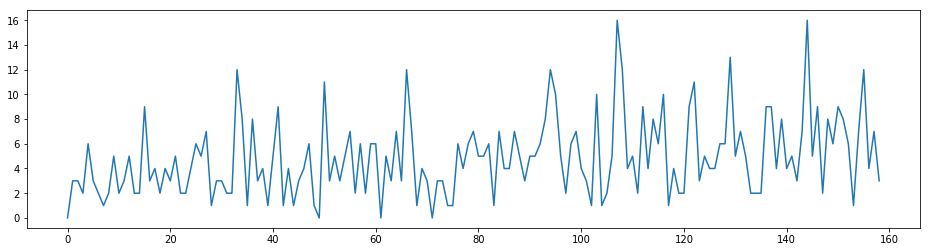

In [687]:
plt.figure(1, figsize=(16, 4))
plt.plot(cl_data['Date'], cl_data['Sandwich'])
plt.xscale('linear')
plt.show()

In [688]:
dataset['Item'].value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

In [689]:
correlation = cl_data.corr()

In [669]:
correlation

,Number of Transactions,Bread,Scandinavian,Hot chocolate,Jam,Cookies,Muffin,Coffee,Pastry,Medialuna,...,Coffee granules,Drinking chocolate spoons,Christmas common,Argentina Night,Half slice Monster,Gift voucher,Cherry me Dried fruit,Mortimer,Raw bars,Tacos/Fajita
Number of Transactions,1.000000,0.760201,0.635512,0.424737,0.439158,0.182585,0.388455,0.849286,0.511036,0.443518,...,0.127098,0.043268,-0.069073,0.132236,0.047692,-0.050219,0.029733,0.051966,-0.067038,0.089076
Bread,0.760201,1.000000,0.507221,0.388849,0.305092,0.078220,0.270556,0.636119,0.363617,0.462856,...,0.107614,0.048363,-0.132175,0.089133,-0.001910,-0.086962,0.029846,0.006366,-0.057688,0.033153
Scandinavian,0.635512,0.507221,1.000000,0.237263,0.327595,-0.059696,0.398727,0.460862,0.240346,0.431581,...,0.048305,-0.031581,-0.042774,0.163189,0.006749,-0.051796,0.082465,0.003896,-0.051796,0.156348
Hot chocolate,0.424737,0.388849,0.237263,1.000000,0.150000,0.111372,0.065273,0.422413,0.145206,0.393950,...,0.030408,-0.028873,-0.109758,-0.075226,0.033742,-0.080584,-0.054101,0.006013,-0.050856,-0.065611
Jam,0.439158,0.305092,0.327595,0.150000,1.000000,-0.063363,0.139081,0.297692,0.260415,0.299499,...,-0.078991,-0.101852,-0.063480,-0.018425,-0.034490,-0.048012,0.005617,-0.062327,-0.048012,-0.013870
Cookies,0.182585,0.078220,-0.059696,0.111372,-0.063363,1.000000,-0.035600,0.246184,0.157581,-0.093793,...,0.157386,0.057155,-0.018012,-0.036012,0.117043,0.085192,-0.003587,0.044743,-0.012964,-0.070450
Muffin,0.388455,0.270556,0.398727,0.065273,0.139081,-0.035600,1.000000,0.350314,0.199220,0.296583,...,0.124809,0.054243,0.029628,0.074275,0.058852,-0.031179,0.000258,0.057097,-0.007684,0.070000
Coffee,0.849286,0.636119,0.460862,0.422413,0.297692,0.246184,0.350314,1.000000,0.446104,0.440045,...,0.151060,0.058381,-0.084094,0.053336,0.063326,-0.055039,-0.026876,0.046964,-0.032753,0.000438
Pastry,0.511036,0.363617,0.240346,0.145206,0.260415,0.157581,0.199220,0.446104,1.000000,0.085155,...,0.126224,0.069916,-0.115048,0.052351,0.037398,0.063777,-0.002138,0.067155,-0.131233,0.016524
Medialuna,0.443518,0.462856,0.431581,0.393950,0.299499,-0.093793,0.296583,0.440045,0.085155,1.000000,...,-0.109304,-0.151436,-0.233602,-0.102943,-0.166066,-0.046181,-0.123450,-0.193890,-0.021541,-0.114489


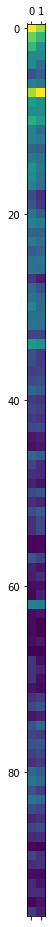

In [670]:
plt.matshow(correlation[['Number of Transactions', 'Coffee']])
plt.show()